ConnectMobile - Customer Management


In [121]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


In [122]:
attrition = pd.read_csv("data.csv")


In [123]:
attrition.head()


,active_cust,income,expenditure,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
0,0,1586,1268.8,85,4,1,0,121,4,85
1,0,1581,1264.8,85,4,1,0,133,4,85
2,0,1594,1275.2,82,4,1,0,118,4,85
3,0,1594,1275.2,82,4,1,0,123,4,85
4,1,1609,1287.2,80,4,1,0,177,4,85


In [124]:
attrition.head()


(100000, 10)

In [125]:
attrition.dtypes

active_cust                     int64
income                          int64
expenditure                   float64
months_on_network               int64
Num_complaints                  int64
number_plan_changes             int64
relocated                       int64
monthly_bill                    int64
technical_issues_per_month      int64
Speed_test_result               int64
dtype: object

In [126]:
#Get a count of the empty values for each column
attrition.isna().sum()

active_cust                   0
income                        0
expenditure                   0
months_on_network             0
Num_complaints                0
number_plan_changes           0
relocated                     0
monthly_bill                  0
technical_issues_per_month    0
Speed_test_result             0
dtype: int64

In [127]:
#Check for any missing/null values in the data
attrition.isnull().values.any()

False

In [128]:
#For checking the null and non null values and datatypes in the dataset
#attrition.info()


In [129]:
attrition.describe()


,active_cust,income,expenditure,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,0.578590,1855.279910,1409.669662,58.402450,4.012840,1.385410,0.123480,95.816450,3.31673,81.668540
std,0.493787,2712.385257,2174.330870,18.643736,0.285265,1.617101,0.328989,50.161327,1.24147,9.952554
min,0.000000,1130.000000,904.000000,-20.000000,3.000000,0.000000,0.000000,30.000000,1.00000,72.000000
25%,0.000000,1674.000000,1248.650000,47.000000,4.000000,0.000000,0.000000,45.000000,3.00000,78.000000
50%,1.000000,1805.000000,1358.400000,56.000000,4.000000,1.000000,0.000000,87.000000,4.00000,81.000000
75%,1.000000,1907.000000,1494.400000,70.000000,4.000000,2.000000,0.000000,133.000000,4.00000,85.000000
max,1.000000,229821.000000,183856.800000,449.000000,6.000000,9.000000,1.000000,181.000000,7.00000,332.000000


In [130]:
attrition['active_cust'].value_counts()


1    57859
0    42141
Name: active_cust, dtype: int64

<Axes: ylabel='count'>

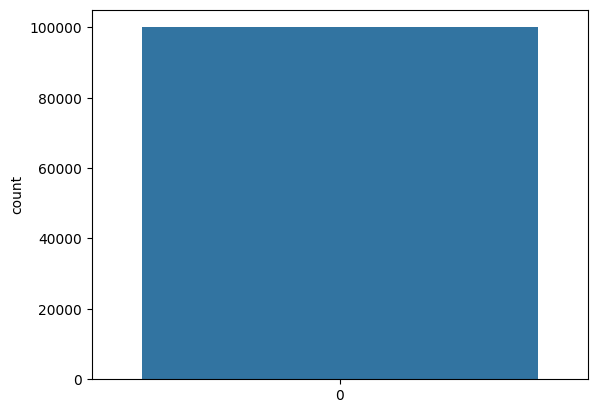

In [131]:
sns.countplot(attrition['active_cust'])


In [132]:
for column in attrition.columns:
    if attrition[column].dtype == "object":
        print(str(column) + ':'+str(attrition[column].unique()))
        print(attrition[column].value_counts())
        print('__________________________________')


In [133]:
attrition.corr()


,active_cust,income,expenditure,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
active_cust,1.000000,0.001201,-0.003939,0.188113,-0.083481,-0.283100,-0.381069,-0.060156,-0.260249,0.156385
income,0.001201,1.000000,0.998436,-0.122607,0.003102,-0.003567,0.001924,-0.004715,-0.002584,0.010451
expenditure,-0.003939,0.998436,1.000000,-0.118989,0.000491,-0.007847,0.001288,-0.006006,-0.005726,0.015505
months_on_network,0.188113,-0.122607,-0.118989,1.000000,-0.081782,0.022509,-0.045471,0.008030,-0.040707,0.020413
Num_complaints,-0.083481,0.003102,0.000491,-0.081782,1.000000,0.073773,0.053539,0.004960,0.019577,0.004148
number_plan_changes,-0.283100,-0.003567,-0.007847,0.022509,0.073773,1.000000,0.595560,0.025379,0.180283,-0.009434
relocated,-0.381069,0.001924,0.001288,-0.045471,0.053539,0.595560,1.000000,0.019341,0.113460,0.015136
monthly_bill,-0.060156,-0.004715,-0.006006,0.008030,0.004960,0.025379,0.019341,1.000000,0.126871,-0.000345
technical_issues_per_month,-0.260249,-0.002584,-0.005726,-0.040707,0.019577,0.180283,0.113460,0.126871,1.000000,-0.054988
Speed_test_result,0.156385,0.010451,0.015505,0.020413,0.004148,-0.009434,0.015136,-0.000345,-0.054988,1.000000


<Axes: >

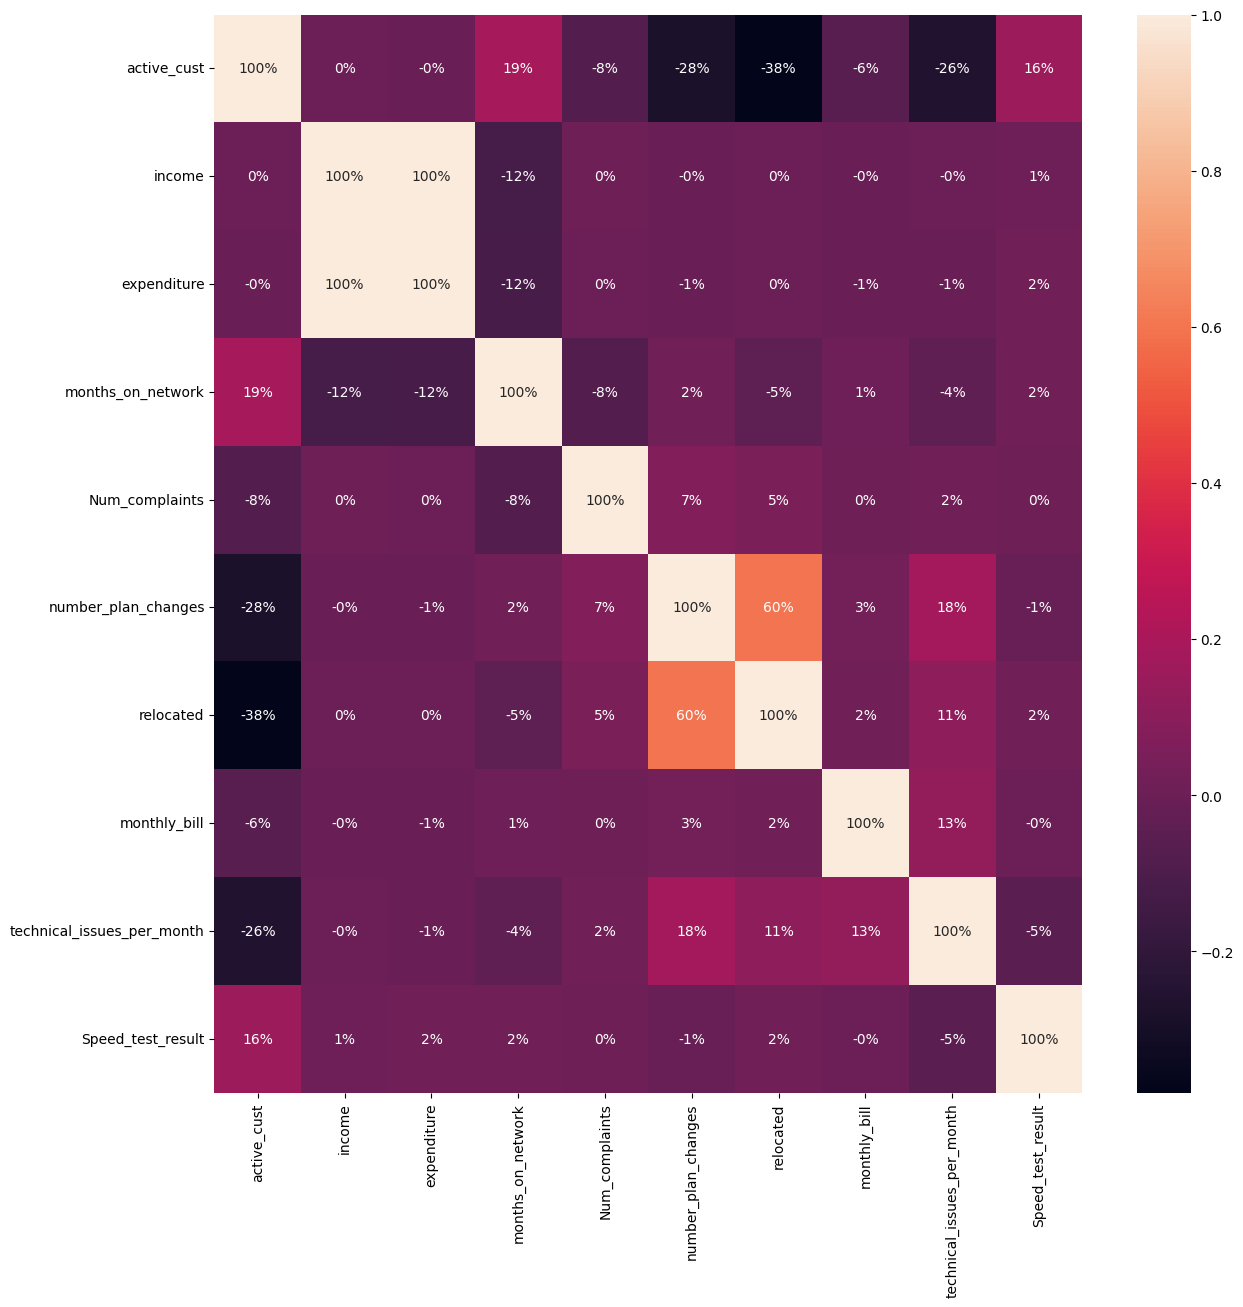

In [134]:
plt.figure(figsize=(14, 14))
sns.heatmap(attrition.corr(), annot=True, fmt='.0%')


In [135]:
# Separating Feature and Target matrices
X = attrition.drop(['active_cust'], axis=1)
y = attrition['active_cust']


In [136]:
scale = StandardScaler()
X = scale.fit_transform(X)


In [137]:
X = attrition.iloc[:, 1:attrition.shape[1]].values
Y = attrition.iloc[:, 0].values


Train-Test Splitting


In [138]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)


In [139]:
print(
    f"Rows in  X Test set: {len(X_test)}\nRows in Y Test set: {len(Y_test)}, Rows in X Train set: {len(X_train)}\nRows in  Y Train set: {len(Y_train)}")


Rows in  X Test set: 20000
Rows in Y Test set: 20000, Rows in X Train set: 80000
Rows in  Y Train set: 80000


In [140]:
forest = RandomForestClassifier(
    n_estimators=10, criterion='entropy', random_state=42)
forest.fit(X_train, Y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [141]:
forest.score(X_train, Y_train)


0.9905625

In [142]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, forest.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print('Model Testing Accuracy={}'.format((TP+TN)/(TP+TN+FN+FP)))


[[ 7292  1126]
 [ 1055 10527]]
Model Testing Accuracy=0.89095
